In [41]:
import os
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [42]:
def getdata(path):
  data = torch.tensor([])
  file_list = os.listdir(path)
  for file_name in file_list[:350]:
    image_path = os.path.join(path, file_name)
    image = mpimg.imread(image_path)
    imageData = torch.from_numpy(image).long()
    data = torch.cat((data, imageData.unsqueeze(0)), dim=0)
  return data

pizza_path = './pizza_vs_not/pizza'
not_pizza_path = './pizza_vs_not/not_pizza'

not_pizza_data = getdata(not_pizza_path)
pizza_data = getdata(pizza_path)

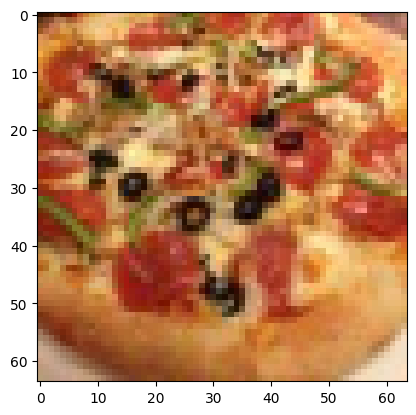

In [89]:
index = 6
data = pizza_data 

plt.imshow(data[index].int())

In [44]:
train_data = torch.cat((pizza_data[:300], not_pizza_data[:200]), dim = 0)
test_data = torch.cat((pizza_data[300:350], not_pizza_data[200:250]), dim = 0)
print(test_data.shape)

torch.Size([100, 64, 64, 3])


In [45]:
# <START>

reshaped_train_data = torch.flatten(train_data).reshape(shape = (500,64*64*3))
reshaped_test_data = torch.flatten(test_data).reshape(shape = (100,64*64*3))

final_train_data = (reshaped_train_data - torch.min(reshaped_train_data))/(torch.max(reshaped_train_data) - torch.min(reshaped_train_data))
final_test_data = (reshaped_test_data - torch.min(reshaped_test_data))/(torch.max(reshaped_test_data) - torch.min(reshaped_test_data))

# <END>

print(final_train_data.shape, final_test_data.shape)

torch.Size([500, 12288]) torch.Size([100, 12288])


In [46]:
# <START>
train_labels = torch.cat((torch.Tensor(np.ones(300)), torch.Tensor(np.zeros(200))), dim = 0).reshape(shape = (500,1))

test_labels = torch.cat((torch.Tensor(np.ones(50)), torch.Tensor(np.ones(50))), dim = 0).reshape(shape = (100,1))

# <END>

print(train_labels.shape, test_labels.shape)

torch.Size([500, 1]) torch.Size([100, 1])


In [47]:
# <START>

D_in = 64*64*3
H1 = 10
H2 = 12
D_out = 1

# <END>

In [76]:

model = torch.nn.Sequential(
    # Do not hard-code any values, use the variables from the previous cell
    # <START>
    nn.Linear(D_in, H1),
    nn.ReLU(),
    nn.Linear(H1, H2),
    nn.Linear(H2, D_out),
    nn.Sigmoid()
    # <END>

)


In [77]:
model(final_train_data[0]) #To check if the model works

tensor([0.5846], grad_fn=<SigmoidBackward0>)

In [78]:
loss_fn = nn.BCELoss()

# <START>

learning_rate = 0.005
iterations = 10000

optimizer = torch.optim.SGD(model.parameters(), learning_rate)

for t in range(iterations):

    # call the model on the dataset
    y_pred = model(final_train_data)

    #calculate the loss
    loss = loss_fn(y_pred, train_labels)

    if t%1000 == 1:
        print(loss)

    #calculate the gradients (dont forget to reset the gradients before you begin)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    # update the values of the parameters
    with torch.no_grad():
      for param in model.parameters():
        param -= learning_rate * param.grad
# <END>

torch.save(model, 'model_best.pt')

tensor(0.6700, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.1119, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0143, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0043, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0022, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0014, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0010, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0006, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0005, grad_fn=<BinaryCrossEntropyBackward0>)


According to the neural network, index = 95 is not a pizza


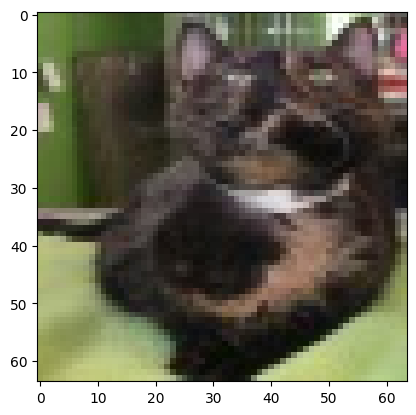

In [79]:
# Change values of index
# <START>
index = 95 #0 to 99
# <END>

plt.imshow(test_data[index].int())
print (f'According to the neural network, index = {index} is {"a pizza" if model(final_test_data[index]) > 0.5 else "not a pizza"}' )

In [80]:
def predict(model, data, labels):

    probabilities = model(data)

    # <START>

    # generate the predictions tensor using the probabilities variable, which indicates the prediction made by the model for the given data using 0 and 1

    predictions = probabilities>0.5

    # <END>

    print("Accuracy: "  + str(torch.sum((predictions == labels)).item()/predictions.shape[0]))

In [81]:
predict(model, final_train_data, train_labels)
predict(model,final_test_data,test_labels)
print("Done!")

Accuracy: 1.0
Accuracy: 0.56
Done!
